In [16]:
# In this exercise we'll examine a learner which has high variance, and tries to learn
# nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

In [17]:
# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

In [18]:
# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

In [28]:
score

make_scorer(explained_variance_score)

In [48]:
def plot_curve():
    reg = DecisionTreeRegressor()
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need 'size', 'cv' and 'score' from above.
    #learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_sizes = [100,200,300,400,500]
    training_sizes, training_scores, testing_scores = learning_curve(reg, X, y, train_sizes, cv)

    # TODO: Plot the training curves and the testing curves
    #       Use plt.plot twice -- one for each score. Be sure to give them labels!
    
    plt.plot(training_sizes, training_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, testing_scores, 'o-', color="g", label="Cross-validation score")
    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()

Regressor score: 1.0000


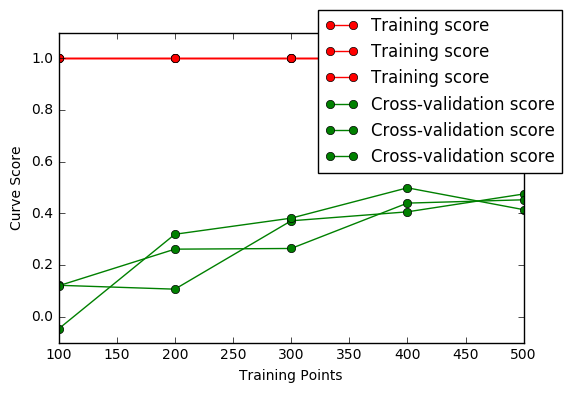

In [49]:
plot_curve()
